In [22]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

In [35]:
muon_mass = 0.1056583755 #GeV/c^2
subfix1 = "smearx05y05"
subfix2 = "_aliceseed_elosscorr_MScorr_HelixMSEloss"
subfix3 = "_r05_05"
subfix4 = "_p_0.1_4"
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/"+subfix1+subfix2+subfix4+"/"
png = ".png"
filename = folder+"garlitetest_"+subfix1+subfix2+subfix3+subfix4+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      


In [36]:
hpresSeed   = ROOT.TH1D( 'hpresSeed', 'p Residuals Seed', 101, -0.8, 0.8)
hpresKalman   = ROOT.TH1D( 'hpresKalman', 'p Residuals Kalman', 101, -0.8, 0.8 )

hsinphiresKalman   = ROOT.TH1D( 'hpsinphiKalman', 'p0 Residuals Kalman', 101, -2, 2)
htanlambdaresKalman   = ROOT.TH1D( 'htanlambdaKalman', 'p1 Residuals Kalman', 101, -2, 2)
hpTinvresKalman   = ROOT.TH1D( 'hpTinvKalman', 'p2 Residuals Kalman', 101, -0.8, 0.8 )
hyresKalman   = ROOT.TH1D( 'hyresKalman', 'p3 Residuals Kalman', 101, -0.3, 0.3 )
hxresKalman   = ROOT.TH1D( 'hxresKalman', 'p4 Residuals Kalman', 101, -0.3, 0.3)

#hsinphiresKalmansecond   = ROOT.TH1D( 'hpsinphiKalmansecond', 'p Residuals Kalman', 101, -0.2, 0.2)

hsinphiresSeed   = ROOT.TH1D( 'hpsinphiSeed', 'p0 Residuals Seed', 101, -2, 2)
htanlambdaresSeed   = ROOT.TH1D( 'htanlambdaSeed', 'p1 Residuals Seed', 101, -2, 2 )
hpTinvresSeed   = ROOT.TH1D( 'hpTinvSeed', 'p2 Residuals Seed', 101, -0.8, 0.8 )
hyresSeed   = ROOT.TH1D( 'hyresSeed', 'p3 Residuals Seed', 101, -0.3, 0.3 )
hxresSeed   = ROOT.TH1D( 'hxresSeed', 'p4 Residuals Seed', 101, -0.3, 0.3)

hrelEloss = ROOT.TH1D( 'hrelEloss', 'Rel Eloss', 101, 0, 0.1)
hrelElossVSp = ROOT.TH2D( 'hrelElossVSp', 'Rel Eloss VS p', 101, 0, 5, 101, 0, 0.1)
hrelElossVSnPlanes = ROOT.TH2D( 'hrelElossVSnplanes', 'Rel Eloss VS nplanes',4,3,7, 101, 0, 0.1)
hrelElossVSp_prof = ROOT.TProfile( 'hrelElossVSp_prof', 'Rel Eloss VS p', 101, 0, 5, 0, 0.1,"s")
hrelElossVSnPlanes_prof = ROOT.TProfile( 'hrelElossVSnplanes_prof', 'Rel Eloss VS nplanes',4,3,7, 0, 0.1,"s")

hrelploss = ROOT.TH1D( 'hrelploss', 'Rel ploss', 101, 0, 0.1)
hrelplossVSp = ROOT.TH2D( 'hrelplossVSp', 'Rel ploss VS p', 101, 0, 5, 101, 0, 0.1)
hrelplossVSnPlanes = ROOT.TH2D( 'hrelplossVSnplanes', 'Rel ploss VS nplanes',4,3,7, 101, 0, 0.1)
hrelplossVSp_prof = ROOT.TProfile( 'hrelplossVSp_prof', 'Rel ploss VS p', 101, 0, 5, 0, 0.1,"s")
hrelplossVSnPlanes_prof = ROOT.TProfile( 'hrelplossVSnplanes_prof', 'Rel ploss VS nplanes',4,3,7, 0, 0.1,"s")

hEloss3planes = ROOT.TH1D( 'hEloss3planes', 'E loss 3 planes', 40, 0, 0.2)
hEloss4planes = ROOT.TH1D( 'hEloss4planes', 'E loss 4 planes', 40, 0, 0.2)
hEloss5planes = ROOT.TH1D( 'hEloss5planes', 'E loss 5 planes', 40, 0, 0.2)
hEloss6planes = ROOT.TH1D( 'hEloss6planes', 'E loss 6 planes', 40, 0, 0.2)

In [37]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    #pMC = np.sqrt(t.pxyz_plane.at(0).X()*t.pxyz_plane.at(0).X()+t.pxyz_plane.at(0).Y()*t.pxyz_plane.at(0).Y()+t.pxyz_plane.at(0).Z()*t.pxyz_plane.at(0).Z())
    pMCstart = np.sqrt(t.pxyz.at(0).X()*t.pxyz.at(0).X()+t.pxyz.at(0).Y()*t.pxyz.at(0).Y()+t.pxyz.at(0).Z()*t.pxyz.at(0).Z())
    pMCend = np.sqrt(t.pxyz.at(t.pxyz.size()-1).X()*t.pxyz.at(t.pxyz.size()-1).X()+t.pxyz.at(t.pxyz.size()-1).Y()*t.pxyz.at(t.pxyz.size()-1).Y()+t.pxyz.at(t.pxyz.size()-1).Z()*t.pxyz.at(t.pxyz.size()-1).Z())
    EMCstart = np.sqrt(np.square(pMCstart)+np.square(muon_mass))
    EMCend = np.sqrt(np.square(pMCend)+np.square(muon_mass))
    relEloss = (EMCstart-EMCend)/EMCstart
    relploss = (pMCstart-pMCend)/pMCstart
    nplanes = t.nHits_perPlane.size()
    pMC = np.abs((1/np.cos(np.arctan(t.tanlambda_plane.at(0))))*1/t.invpT_plane.at(0))
    pMCfactor = (1/np.cos(np.arctan(t.tanlambda_plane.at(0))))
    #print(pMCfactor)
    #print(tanlambdaMC)
    invpTMC = t.invpT_plane.at(0)
    
    sinphiMC = t.sinphi_plane.at(0)
    sinphiMCsecond = t.sinphi_plane.at(1)
    tanlambdaMC = t.tanlambda_plane.at(0)
    yMC = t.xyz_plane.at(0).Y()
    xMC = t.xyz_plane.at(0).x()
    
    #print(invpTMC)

    pSeed = np.abs((1/np.cos(np.arctan(t.tanlambda_seed)))*(0.5*0.299792458e-2)/t.curvature_seed)
    invpTSeed = t.curvature_seed/(0.5*0.00299792458)
    sinphiSeed= t.sinphi_seed
    tanlambdaSeed=t.tanlambda_seed
    ySeed = t.xyz_seed.Y()
    xSeed = t.xyz_seed.X()

    pKalman = np.abs((1/np.cos(np.arctan(t.parvect_bkw.at(t.parvect_bkw.size()-1)[3])))/t.parvect_bkw.at(t.parvect_bkw.size()-1)[4])
    invpTKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[4]
    sinphiKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[2]
    sinphiKalmansecond = t.parvect.at(0)[2]
    tanlambdaKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[3]
    yKalman= t.parvect_bkw.at(t.parvect_bkw.size()-1)[0]
    xKalman= t.parvect_bkw.at(t.parvect_bkw.size()-1)[1]


    #if (pSeed-pMC)/pMC>1:
        #print(invpTMC)
        #print(invpTSeed)
        #print(invpTKalman)
    #print(invpTKalman)

    hpresSeed.Fill((pSeed-pMC)/pMC)
    hsinphiresSeed.Fill((sinphiSeed-sinphiMC)/sinphiMC)
    htanlambdaresSeed.Fill((tanlambdaSeed-tanlambdaMC)/tanlambdaMC)
    hpTinvresSeed.Fill((invpTSeed-invpTMC)/invpTMC)
    hyresSeed.Fill((ySeed-yMC)/yMC)
    hxresSeed.Fill((xSeed-xMC)/xMC)

    #hsinphiresKalmansecond.Fill((sinphiKalmansecond-sinphiMCsecond)/sinphiMCsecond) 

    hpresKalman.Fill((pKalman-pMC)/pMC)
    hsinphiresKalman.Fill((sinphiKalman-sinphiMC)/sinphiMC)
    htanlambdaresKalman.Fill((tanlambdaKalman-tanlambdaMC)/tanlambdaMC)
    hpTinvresKalman.Fill((invpTKalman-invpTMC)/invpTMC)
    hyresKalman.Fill((yKalman-yMC)/yMC)
    hxresKalman.Fill((xKalman-xMC)/xMC)

    hrelEloss.Fill(relEloss)
    hrelElossVSnPlanes.Fill(nplanes,relEloss)
    hrelElossVSp.Fill(pMCstart,relEloss)
    hrelElossVSnPlanes_prof.Fill(nplanes,relEloss)
    hrelElossVSp_prof.Fill(pMCstart,relEloss)

    hrelploss.Fill(relploss)
    hrelplossVSnPlanes.Fill(nplanes,relploss)
    hrelplossVSp.Fill(pMCstart,relploss)
    hrelplossVSnPlanes_prof.Fill(nplanes,relploss)
    hrelplossVSp_prof.Fill(pMCstart,relploss)

    if nplanes == 3: hEloss3planes.Fill(EMCstart-EMCend)
    if nplanes == 4: hEloss4planes.Fill(EMCstart-EMCend)
    if nplanes == 5: hEloss5planes.Fill(EMCstart-EMCend)
    if nplanes == 6: hEloss6planes.Fill(EMCstart-EMCend)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamep
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/pressmearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/p0ressmearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_p_0.1_4/p1r

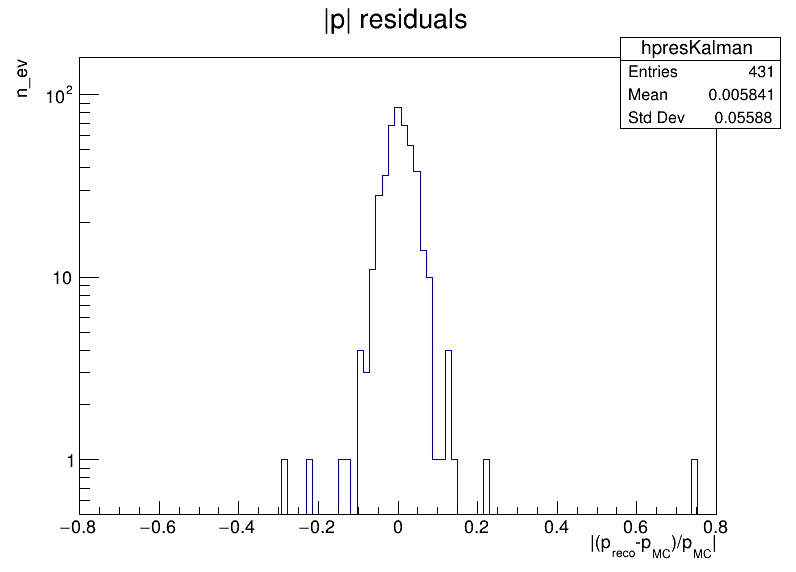

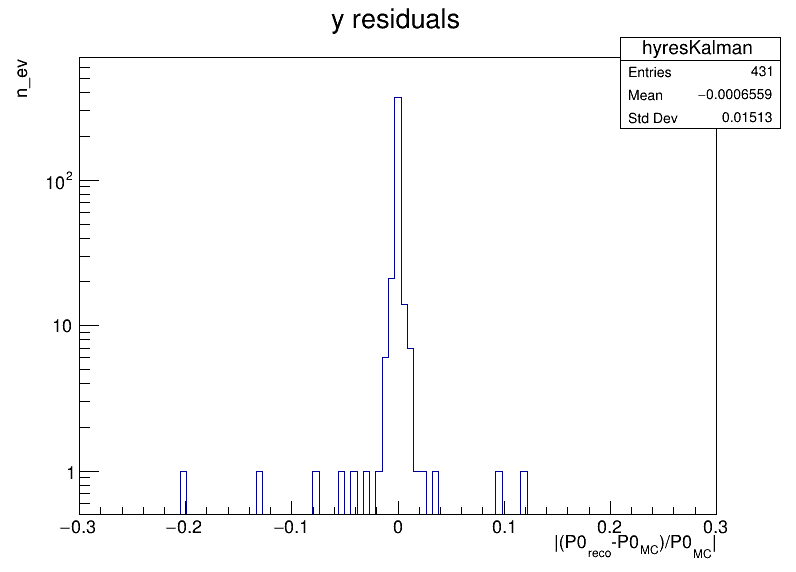

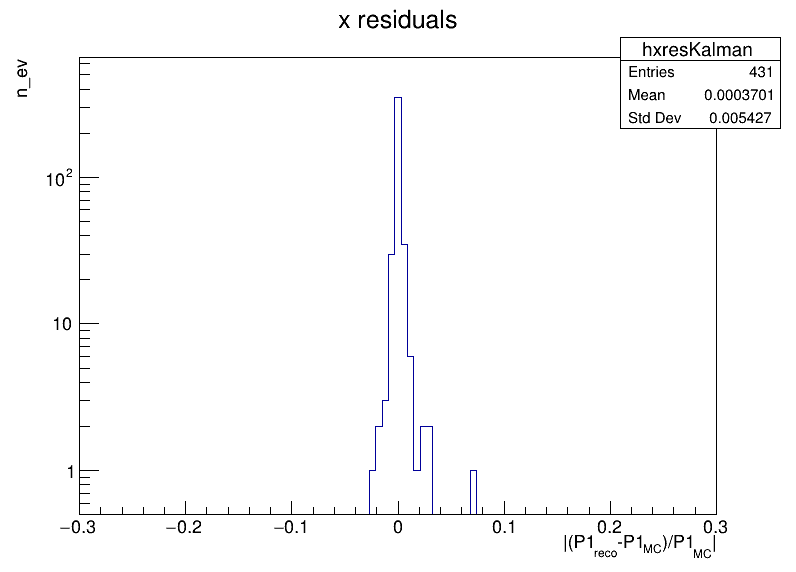

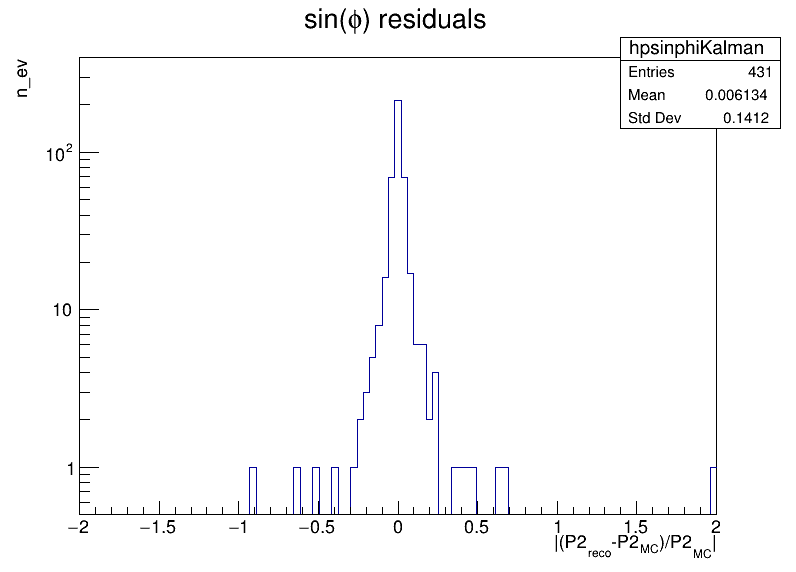

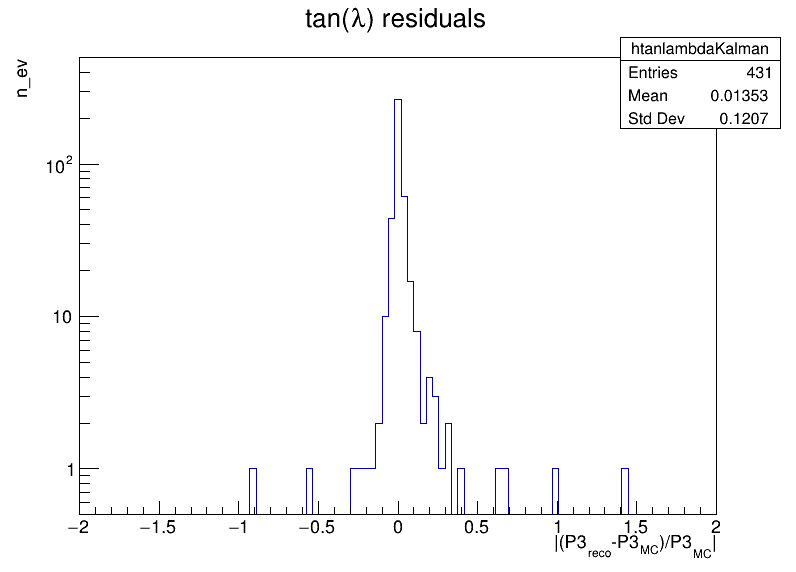

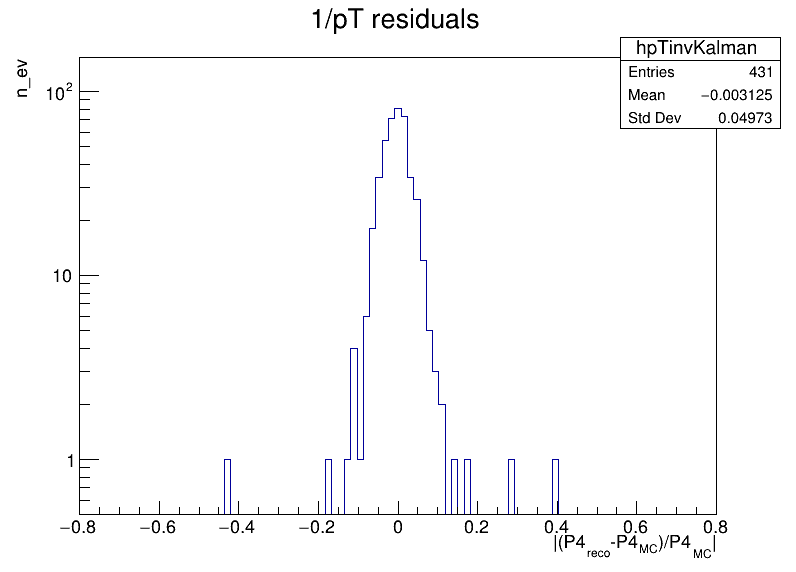

In [38]:
cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
gPad.SetLogy()
hpresKalman.SetTitle("|p| residuals;|(p_{reco}-p_{MC})/p_{MC}|;n_ev")
hpresKalman.Draw()
cp.Draw()
save=folder+"pres"+subfix1+subfix2+subfix3+png
cp.Print(save)

c0 = ROOT.TCanvas("myCanvasName0","The Canvas Title0",800,600)
gPad.SetLogy()
hyresKalman.SetTitle("y residuals;|(P0_{reco}-P0_{MC})/P0_{MC}|;n_ev")
hyresKalman.Draw()
c0.Draw()
save=folder+"p0res"+subfix1+subfix2+subfix3+png
c0.Print(save)

c1 = ROOT.TCanvas("myCanvasName1","The Canvas Title1",800,600)
gPad.SetLogy()
hxresKalman.SetTitle("x residuals;|(P1_{reco}-P1_{MC})/P1_{MC}|;n_ev")
hxresKalman.Draw()
c1.Draw()
save=folder+"p1res"+subfix1+subfix2+subfix3+png
c1.Print(save)

c2 = ROOT.TCanvas("myCanvasName2","The Canvas Title2",800,600)
gPad.SetLogy()
hsinphiresKalman.SetTitle("sin(#phi) residuals;|(P2_{reco}-P2_{MC})/P2_{MC}|;n_ev")
hsinphiresKalman.Draw()
c2.Draw()
save=folder+"p2res"+subfix1+subfix2+subfix3+png
c2.Print(save)

c3 = ROOT.TCanvas("myCanvasName3","The Canvas Title3",800,600)
gPad.SetLogy()
htanlambdaresKalman.SetTitle("tan(#lambda) residuals;|(P3_{reco}-P3_{MC})/P3_{MC}|;n_ev")
htanlambdaresKalman.Draw()
c3.Draw()
save=folder+"p3res"+subfix1+subfix2+subfix3+png
c3.Print(save)

c4 = ROOT.TCanvas("myCanvasName4","The Canvas Title4",800,600)
gPad.SetLogy()
hpTinvresKalman.SetTitle("1/pT residuals;|(P4_{reco}-P4_{MC})/P4_{MC}|;n_ev")
hpTinvresKalman.Draw()
c4.Draw()
save=folder+"p4res"+subfix1+subfix2+subfix3+png
c4.Print(save)

#c2t = ROOT.TCanvas("myCanvasName2t","The Canvas Title2t",800,600)
#gPad.SetLogy()
#hsinphiresKalmansecond.SetTitle("sin(#phi) residuals;|(P2_{reco}-P2_{MC})/P2_{MC}|;n_ev")
#hsinphiresKalmansecond.Draw()
#c2t.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameps
python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixElossMS_p_0.1_4/helix_pressmearx05y05_aliceseed_elosscorr_MScorr_HelixElossMS_r05_05.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixElossMS_p_0.1_4/helix_pressmearx05y05_aliceseed_elosscorr_MScorr_HelixElossMS_r05_05.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName0s
python ERROR: cannot open image file "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixElossMS_p_0.1_4/helix_p0ressmearx05y05_aliceseed_elosscorr

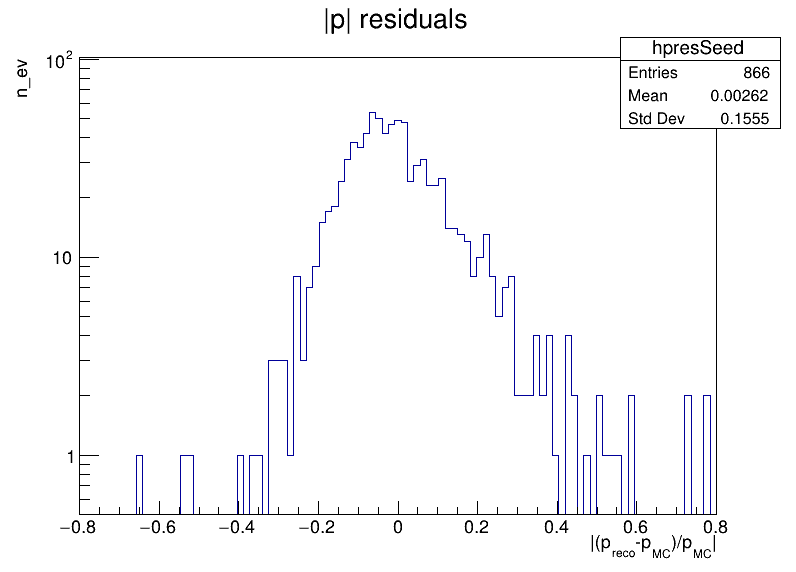

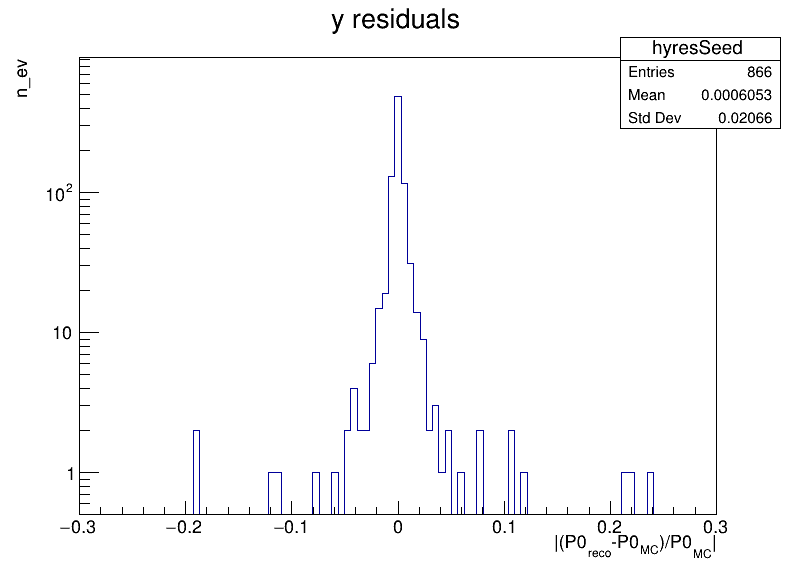

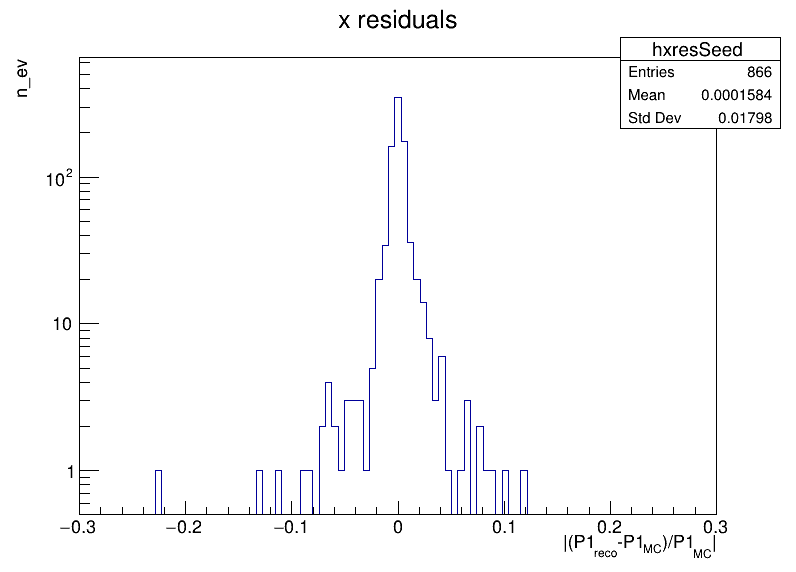

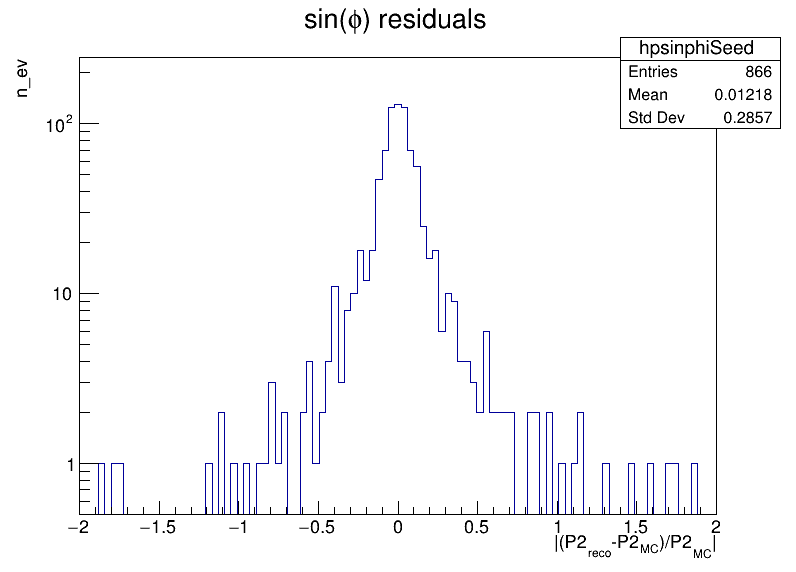

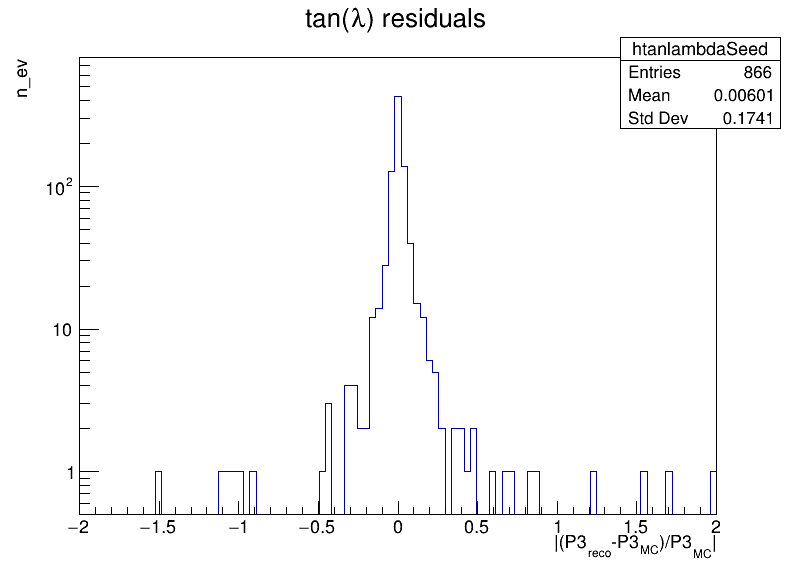

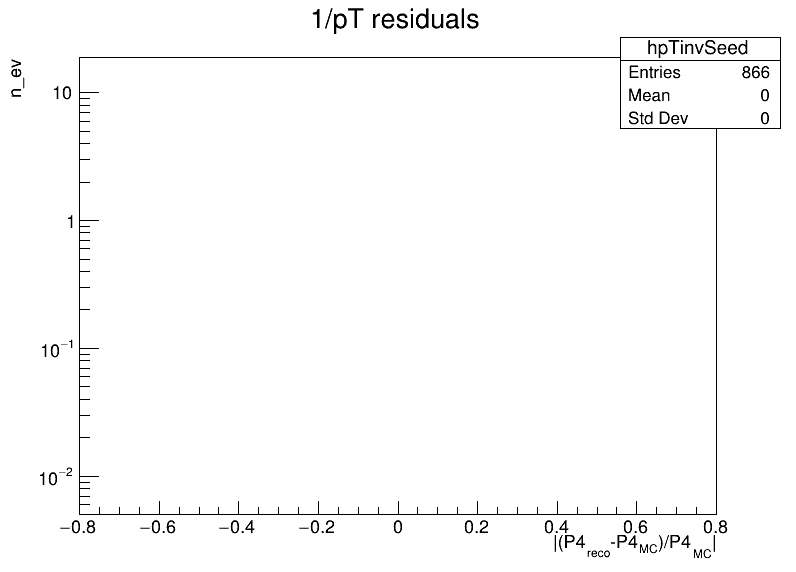

In [33]:
cps = ROOT.TCanvas("myCanvasNameps","The Canvas Titleps",800,600)
gPad.SetLogy()
hpresSeed.SetTitle("|p| residuals;|(p_{reco}-p_{MC})/p_{MC}|;n_ev")
hpresSeed.Draw()
cps.Draw()
save=folder+"helix_"+"pres"+subfix1+subfix2+subfix3+png
cps.Print(save)

c0s = ROOT.TCanvas("myCanvasName0s","The Canvas Title0s",800,600)
gPad.SetLogy()
hyresSeed.SetTitle("y residuals;|(P0_{reco}-P0_{MC})/P0_{MC}|;n_ev")
hyresSeed.Draw()
c0s.Draw()
save=folder+"helix_"+"p0res"+subfix1+subfix2+subfix3+png
c0s.Print(save)

c1s = ROOT.TCanvas("myCanvasName1s","The Canvas Title1s",800,600)
gPad.SetLogy()
hxresSeed.SetTitle("x residuals;|(P1_{reco}-P1_{MC})/P1_{MC}|;n_ev")
hxresSeed.Draw()
c1s.Draw()
save=folder+"helix_"+"p1res"+subfix1+subfix2+subfix3+png
c1s.Print(save)

c2s = ROOT.TCanvas("myCanvasName2s","The Canvas Title2s",800,600)
gPad.SetLogy()
hsinphiresSeed.SetTitle("sin(#phi) residuals;|(P2_{reco}-P2_{MC})/P2_{MC}|;n_ev")
hsinphiresSeed.Draw()
c2s.Draw()
save=folder+"helix_"+"p2res"+subfix1+subfix2+subfix3+png
c2s.Print(save)

c3s = ROOT.TCanvas("myCanvasName3s","The Canvas Title3s",800,600)
gPad.SetLogy()
htanlambdaresSeed.SetTitle("tan(#lambda) residuals;|(P3_{reco}-P3_{MC})/P3_{MC}|;n_ev")
htanlambdaresSeed.Draw()
c3s.Draw()
save=folder+"helix_"+"p3res"+subfix1+subfix2+subfix3+png
c3s.Print(save)

c4s = ROOT.TCanvas("myCanvasName4s","The Canvas Title4s",800,600)
gPad.SetLogy()
hpTinvresSeed.SetTitle("1/pT residuals;|(P4_{reco}-P4_{MC})/P4_{MC}|;n_ev")
hpTinvresSeed.Draw()
c4s.Draw()
save=folder+"helix_"+"p4res"+subfix1+subfix2+subfix3+png
c4s.Print(save)

In [7]:
#dEdx   = ROOT.TH2D( 'dedx', '|dEdxMC| VS |dEdxreco|', 101, 0.0019, 0.0025, 101, 0.0019,0.0025 )
dEdx   = ROOT.TH2D( 'dedx', '|dEdxMC| VS |dEdxreco|', 101, 0.0016, 0.0028, 101, 0.0016,0.0028 )
dEdxprof   = ROOT.TProfile('dedxprof', '|dEdxMC| VS |dEdxreco|', 101, 0.0016, 0.0028, 0.0016,0.0028,"s")


In [8]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    #print(iev)
    for i in range(t.hitid.size()):
        if t.dxreco.size()<=t.hitid.at(i).size() : break
        #print(t.dxreco.size(),i)
        for j in range(t.hitid.at(i).size()):
            #print(t.dxreco.at(i).size(),t.hitid.at(i).size())
            #if t.dxreco.at(i).size()<=t.hitid.at(i).size() : continue
            currentid=int(t.hitid.at(i).at(j))
            step=0
            dxMC = 0
            dEMC = 0
            
            if i==0 and j==0 :
                continue 

            elif i>0 and j==0  :
                step= currentid
                dxMC += t.dxsim.at(i-1).at(int(t.dxsim.at(i-1).size()-1)) + t.dxsim.at(i).at(0)
                dEMC += t.dEsim.at(i-1).at(int(t.dEsim.at(i-1).size()-1)) + t.dEsim.at(i).at(0)
                for k in range(int(step)):
                    dxMC += t.dxsim.at(i).at(int(currentid-k))
                    dEMC += t.dEsim.at(i).at(int(currentid-k)) 

            else :
                step=int(t.hitid.at(i).at(j)-t.hitid.at(i).at(j-1))
                for k in range(int(step)):
                    dxMC += t.dxsim.at(i).at(int(currentid-k))
                    dEMC += t.dEsim.at(i).at(int(currentid-k))
                
            dxkal = 0
            dEkal = 0

            if i==0 :
                dxkal = t.dxreco.at(i).at(j-1)
                dEkal = t.dEreco.at(i).at(j-1)
            else : 
                dxkal = t.dxreco.at(i).at(j)
                dEkal = t.dEreco.at(i).at(j)
                
            #if iev==0 : print("dxMC: ",dxMC," dxkal: ",dxkal)
            dEdx.Fill(abs(dEkal/dxkal),abs(dEMC/dxMC))
            dEdxprof.Fill(abs(dEkal/dxkal),abs(dEMC/dxMC),1)
            #if iev==0 : print("dEdxMC: ",abs(dEMC/dxMC)," dEdxreco: ",abs(dEkal/dxkal))
    
            

In [9]:
nbinsx = dEdxprof.GetXaxis().GetNbins()
averageyRMS = 0
nonemptybins = 0
for i in range(nbinsx):
    if dEdxprof.GetBinContent(i) != 0 :
        averageyRMS+= dEdxprof.GetBinError(i)
        nonemptybins+=1
        #print(dEdxprof.GetBinContent(i)," ",dEdxprof.GetBinError(i))
averageyRMS/=nonemptybins
#print(averageyRMS)


Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/dEdx_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/dEdxprof_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created


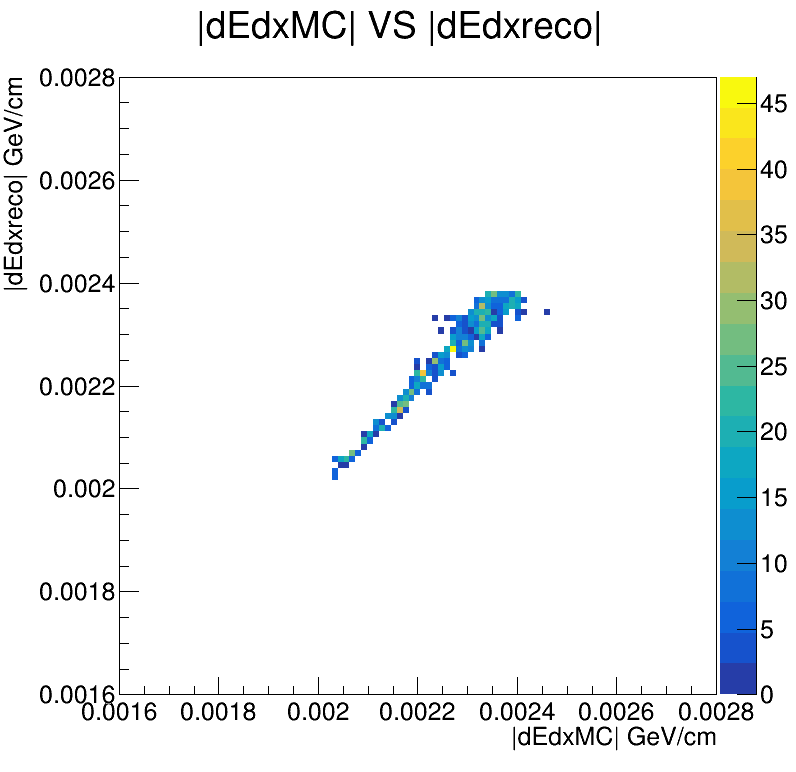

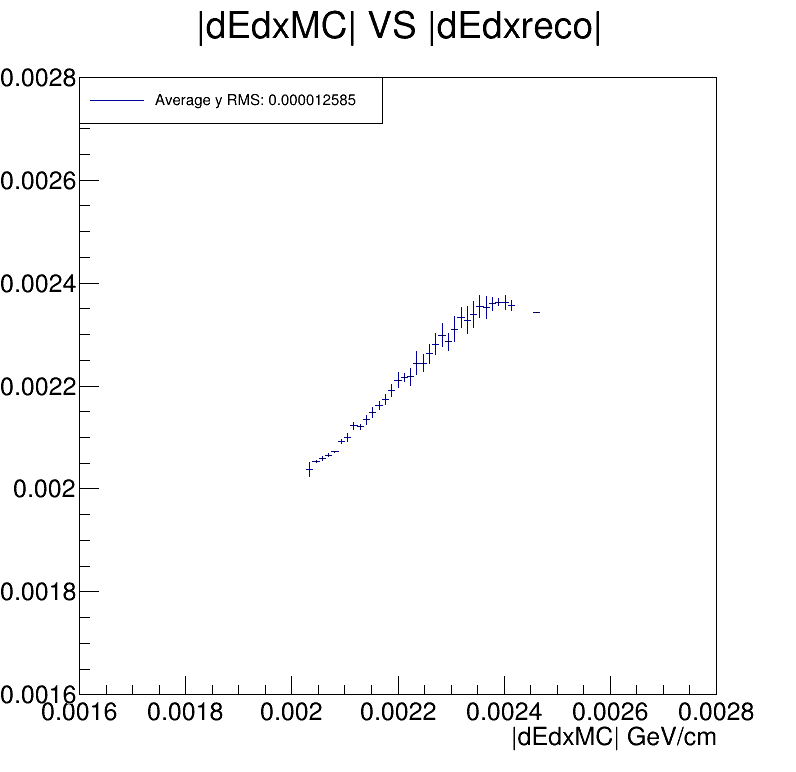

In [10]:
gStyle.SetOptStat(0)
cdEdx = ROOT.TCanvas("myCanvasNamedE","The Canvas TitledE",800,800)
dEdx.SetTitle("|dEdxMC| VS |dEdxreco|;|dEdxMC| GeV/cm;|dEdxreco| GeV/cm")
dEdx.Draw("colz")
cdEdx.SetLeftMargin(0.15)
cdEdx.Draw()
save=folder+"dEdx_"+subfix1+subfix2+subfix3+png
cdEdx.Print(save)

cdEdxp = ROOT.TCanvas("myCanvasNamedEp","The Canvas TitledEp",800,800)
dEdxprof.SetTitle("|dEdxMC| VS |dEdxreco|;|dEdxMC| GeV/cm;|dEdxreco| GeV/cm")
dEdxprof.SetMaximum(0.0028)
dEdxprof.SetMinimum(0.0016)
dEdxprof.Draw()
legend = ROOT.TLegend(0.1,0.84,0.48,0.9)
legendtext = "Average y RMS: " + "{:.9f}".format(averageyRMS)
legend.AddEntry(dEdxprof,legendtext)
legend.Draw()
cdEdxp.Draw()
save=folder+"dEdxprof_"+subfix1+subfix2+subfix3+png
cdEdxp.Print(save)
#gStyle.SetOptStat(1)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/relploss_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/relplossVSp_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/relplossVSp_prof_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6pla

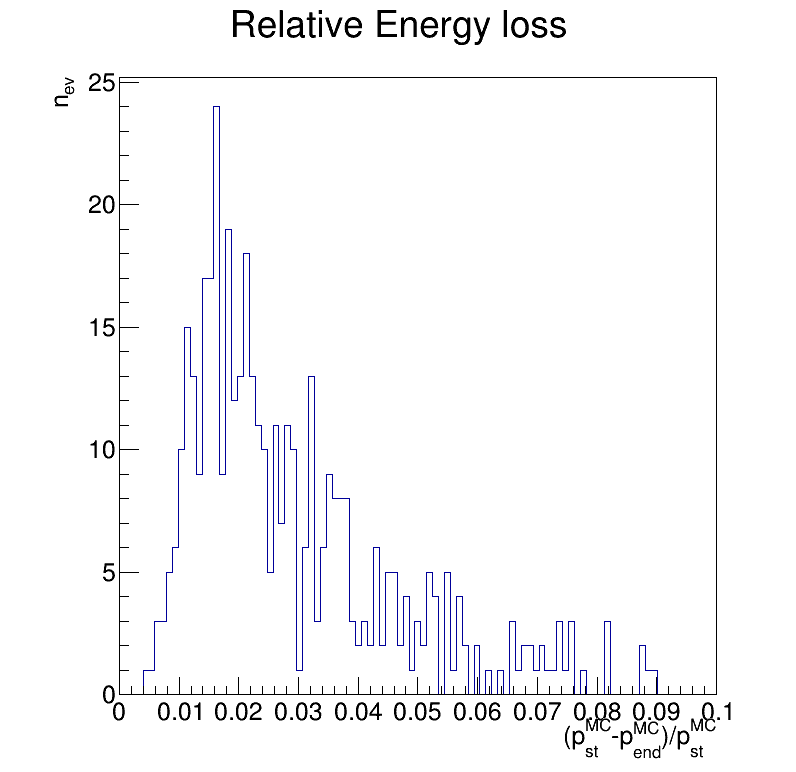

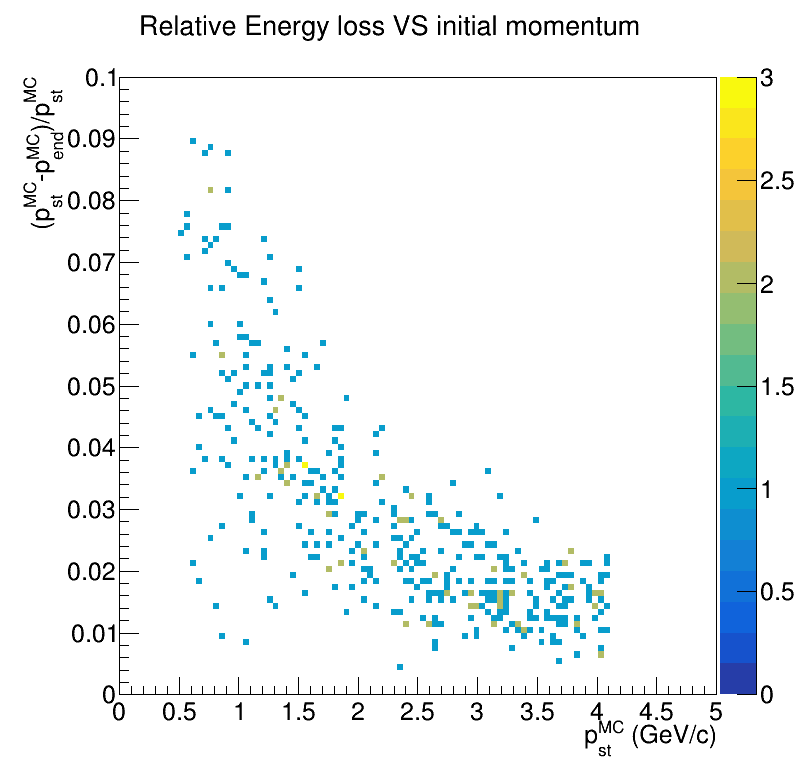

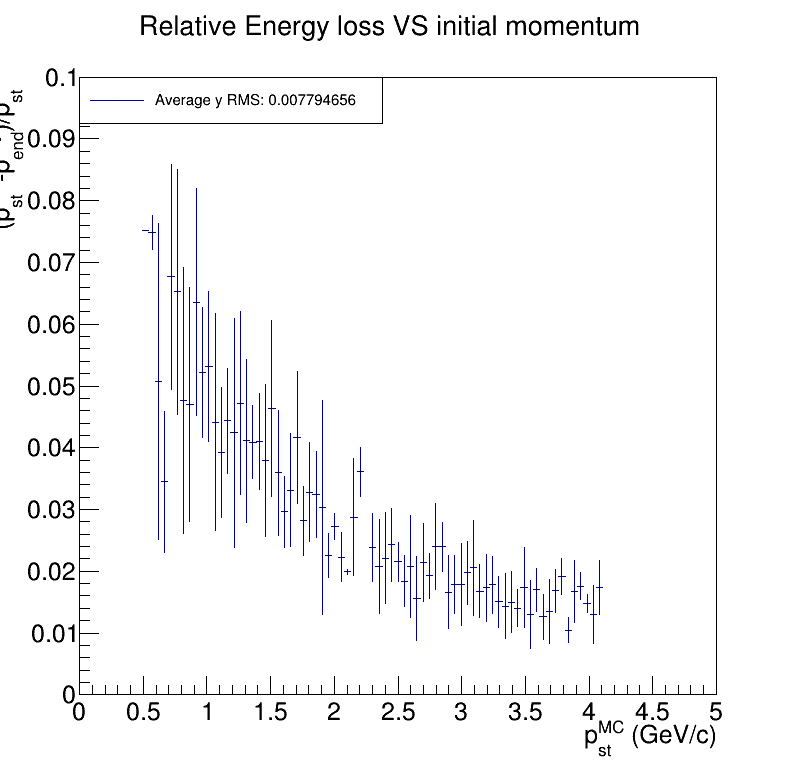

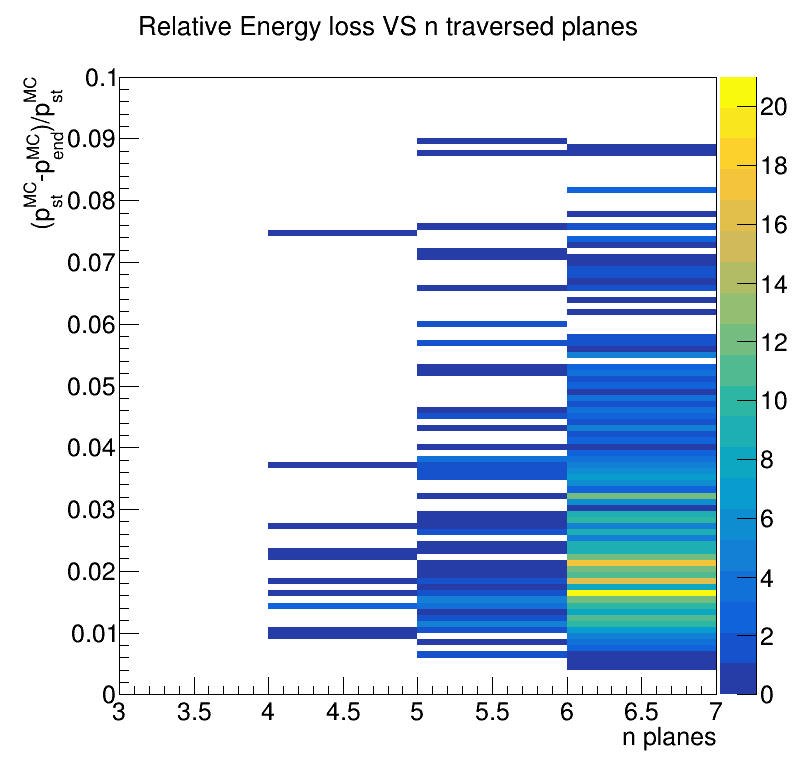

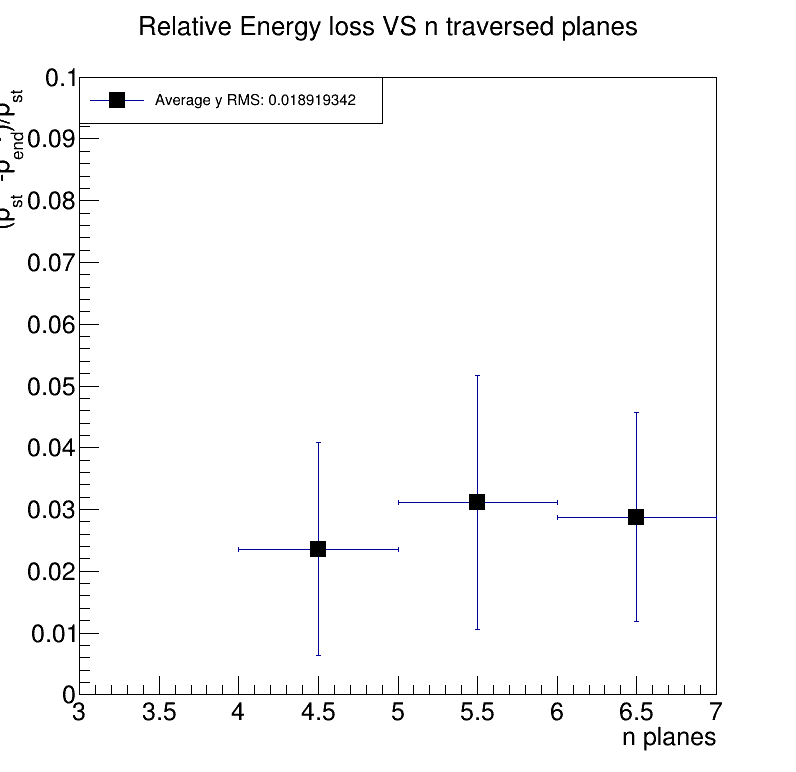

In [11]:
gStyle.SetOptStat(0)
crelploss = ROOT.TCanvas("myCanvasrelploss","The Canvas relploss",800,800)
hrelploss.SetTitle("Relative Energy loss;(p_{st}^{MC}-p_{end}^{MC})/p_{st}^{MC};n_{ev}")
hrelploss.Draw()
crelploss.SetLeftMargin(0.15)
crelploss.Draw()
save=folder+"relploss_"+subfix1+subfix2+subfix3+png
crelploss.Print(save)

crelplossVSp = ROOT.TCanvas("myCanvasrelplossVSp","The Canvas relplossVSp",800,800)
hrelplossVSp.SetTitle("Relative Energy loss VS initial momentum;p_{st}^{MC} (GeV/c);(p_{st}^{MC}-p_{end}^{MC})/p_{st}^{MC}")
hrelplossVSp.Draw("colz")
crelplossVSp.SetLeftMargin(0.15)
crelplossVSp.Draw()
save=folder+"relplossVSp_"+subfix1+subfix2+subfix3+png
crelplossVSp.Print(save)

nbinsx = hrelplossVSp_prof.GetXaxis().GetNbins()
averageyRMS = 0
nonemptybins = 0
for i in range(nbinsx):
    if hrelplossVSp_prof.GetBinContent(i) != 0 :
        averageyRMS+= hrelplossVSp_prof.GetBinError(i)
        nonemptybins+=1
        #print(dEdxprof.GetBinContent(i)," ",dEdxprof.GetBinError(i))
averageyRMS/=nonemptybins

crelplossVSp_prof = ROOT.TCanvas("myCanvasrelplossVSp prof","The Canvas relplossVSp prof",800,800)
hrelplossVSp_prof.SetTitle("Relative Energy loss VS initial momentum;p_{st}^{MC} (GeV/c);(p_{st}^{MC}-p_{end}^{MC})/p_{st}^{MC}")
hrelplossVSp_prof.SetMaximum(0.1)
hrelplossVSp_prof.SetMinimum(0.0)
hrelplossVSp_prof.Draw()
legendrelplossVSp_prof = ROOT.TLegend(0.1,0.84,0.48,0.9)
legendtext = "Average y RMS: " + "{:.9f}".format(averageyRMS)
legendrelplossVSp_prof.AddEntry(hrelplossVSp_prof,legendtext)
legendrelplossVSp_prof.Draw()
crelplossVSp_prof.Draw()
save=folder+"relplossVSp_prof_"+subfix1+subfix2+subfix3+png
crelplossVSp_prof.Print(save)

crelplossVSnPlanes = ROOT.TCanvas("myCanvasrelplossVSnPlanes","The Canvas relplossVSnPlanes",800,800)
hrelplossVSnPlanes.SetTitle("Relative Energy loss VS n traversed planes;n planes;(p_{st}^{MC}-p_{end}^{MC})/p_{st}^{MC}")
hrelplossVSnPlanes.Draw("colz")
crelplossVSnPlanes.SetLeftMargin(0.15)
crelplossVSnPlanes.Draw()
save=folder+"relplossVSnPlanes_"+subfix1+subfix2+subfix3+png
crelplossVSnPlanes.Print(save)

nbinsx = hrelplossVSnPlanes_prof.GetXaxis().GetNbins()
averageyRMS = 0
nonemptybins = 0
for i in range(nbinsx):
    if hrelplossVSnPlanes_prof.GetBinContent(i) != 0 :
        averageyRMS+= hrelplossVSnPlanes_prof.GetBinError(i)
        nonemptybins+=1
        #print(dEdxprof.GetBinContent(i)," ",dEdxprof.GetBinError(i))
averageyRMS/=nonemptybins

crelplossVSnPlanes_prof = ROOT.TCanvas("myCanvasrelplossVSnPlanes prof","The Canvas relplossVSp prof",800,800)
hrelplossVSnPlanes_prof.SetTitle("Relative Energy loss VS n traversed planes;n planes;(p_{st}^{MC}-p_{end}^{MC})/p_{st}^{MC}")
hrelplossVSnPlanes_prof.SetMaximum(0.1)
hrelplossVSnPlanes_prof.SetMinimum(0.0)
hrelplossVSnPlanes_prof.SetMarkerStyle(21)
hrelplossVSnPlanes_prof.SetMarkerSize(2)
#hrelplossVSnPlanes_prof.SetMarkerColor(kRed)
hrelplossVSnPlanes_prof.Draw("E1")
legendrelplossVSnPlanes_prof = ROOT.TLegend(0.1,0.84,0.48,0.9)
legendtext = "Average y RMS: " + "{:.9f}".format(averageyRMS)
legendrelplossVSnPlanes_prof.AddEntry(hrelplossVSnPlanes_prof,legendtext)
legendrelplossVSnPlanes_prof.Draw()
crelplossVSnPlanes_prof.Draw()
save=folder+"relplossVSnPlanes_prof_"+subfix1+subfix2+subfix3+png
crelplossVSnPlanes_prof.Print(save)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/relEloss_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/relElossVSp_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/relElossVSp_prof_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6pla

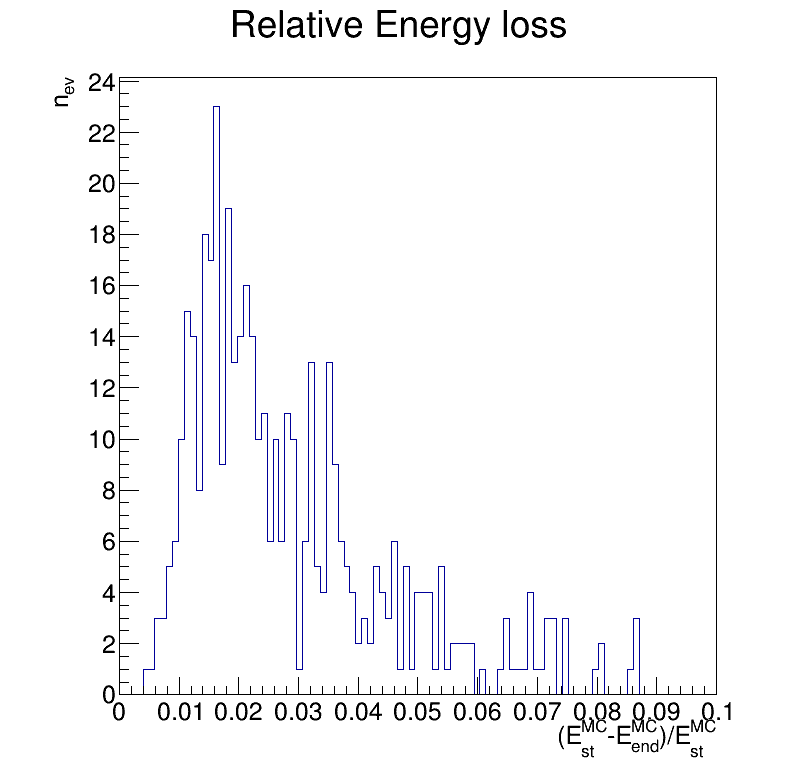

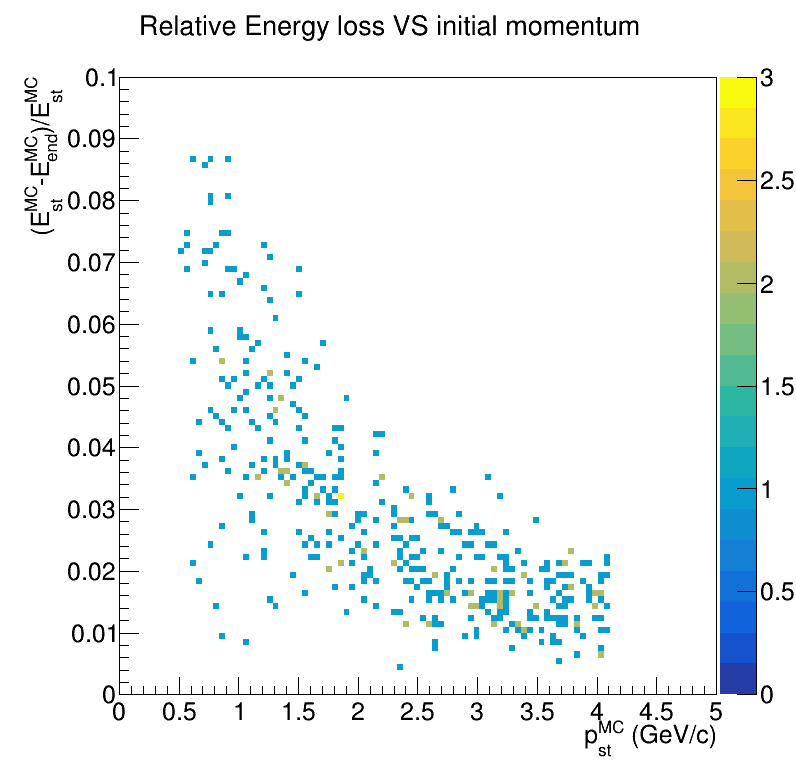

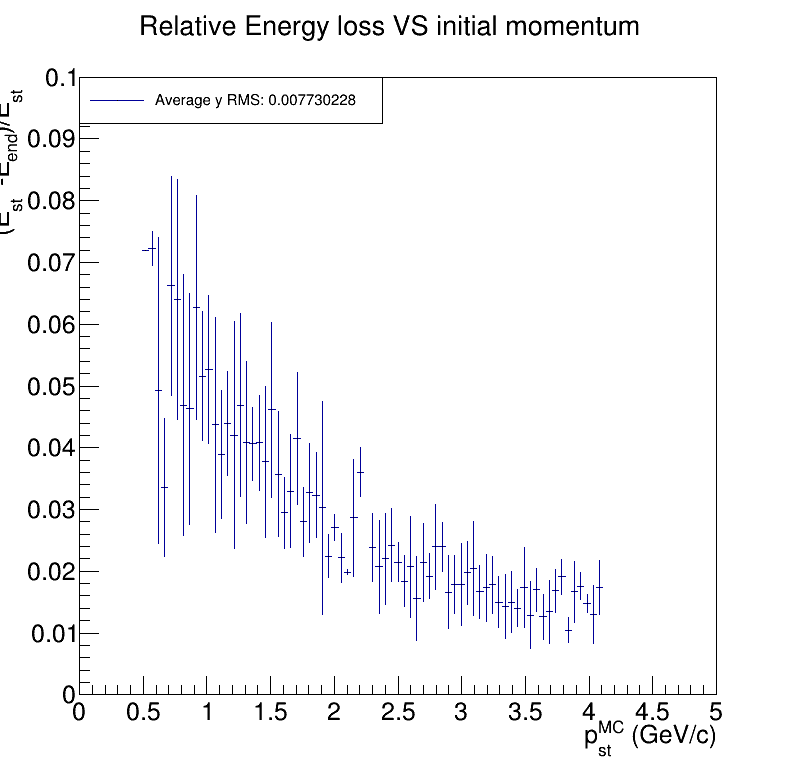

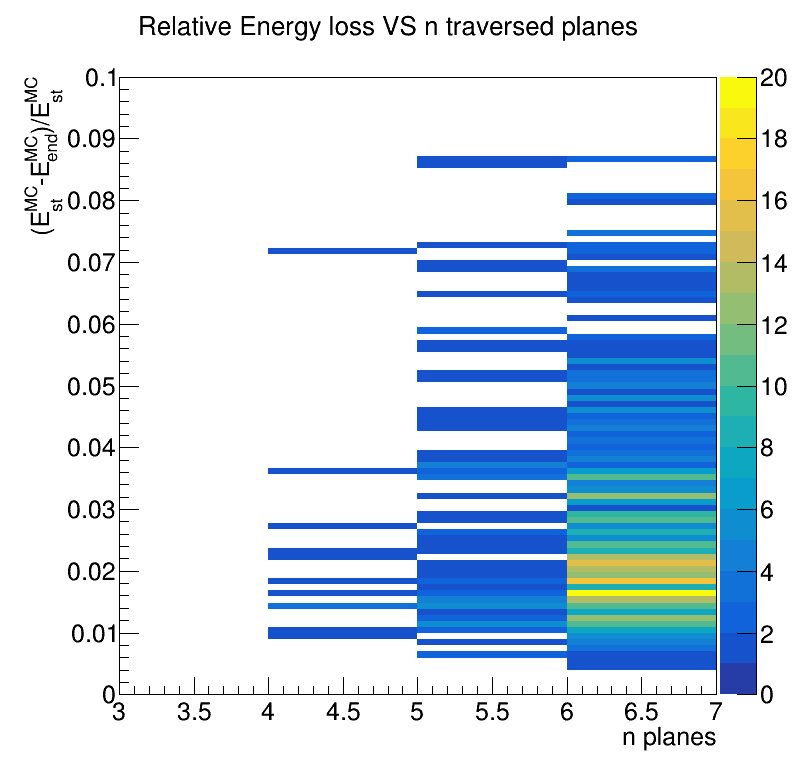

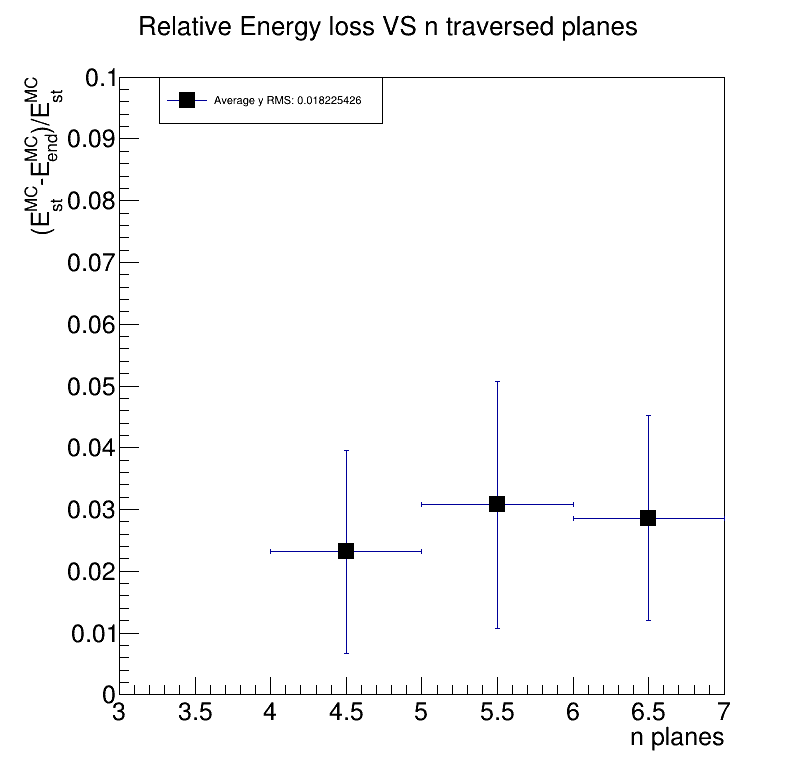

In [12]:
gStyle.SetOptStat(0)
crelEloss = ROOT.TCanvas("myCanvasrelEloss","The Canvas relEloss",800,800)
hrelEloss.SetTitle("Relative Energy loss;(E_{st}^{MC}-E_{end}^{MC})/E_{st}^{MC};n_{ev}")
hrelEloss.Draw()
crelEloss.SetLeftMargin(0.15)
crelEloss.Draw()
save=folder+"relEloss_"+subfix1+subfix2+subfix3+png
crelEloss.Print(save)

crelElossVSp = ROOT.TCanvas("myCanvasrelElossVSp","The Canvas relElossVSp",800,800)
hrelElossVSp.SetTitle("Relative Energy loss VS initial momentum;p_{st}^{MC} (GeV/c);(E_{st}^{MC}-E_{end}^{MC})/E_{st}^{MC}")
hrelElossVSp.Draw("colz")
crelElossVSp.SetLeftMargin(0.15)
crelElossVSp.Draw()
save=folder+"relElossVSp_"+subfix1+subfix2+subfix3+png
crelElossVSp.Print(save)

nbinsx = hrelElossVSp_prof.GetXaxis().GetNbins()
averageyRMS = 0
nonemptybins = 0
for i in range(nbinsx):
    if hrelElossVSp_prof.GetBinContent(i) != 0 :
        averageyRMS+= hrelElossVSp_prof.GetBinError(i)
        nonemptybins+=1
        #print(dEdxprof.GetBinContent(i)," ",dEdxprof.GetBinError(i))
averageyRMS/=nonemptybins

crelElossVSp_prof = ROOT.TCanvas("myCanvasrelElossVSp prof","The Canvas relElossVSp prof",800,800)
hrelElossVSp_prof.SetTitle("Relative Energy loss VS initial momentum;p_{st}^{MC} (GeV/c);(E_{st}^{MC}-E_{end}^{MC})/E_{st}^{MC}")
hrelElossVSp_prof.SetMaximum(0.1)
hrelElossVSp_prof.SetMinimum(0.0)
hrelElossVSp_prof.Draw()
legendrelElossVSp_prof = ROOT.TLegend(0.1,0.84,0.48,0.9)
legendtext = "Average y RMS: " + "{:.9f}".format(averageyRMS)
legendrelElossVSp_prof.AddEntry(hrelElossVSp_prof,legendtext)
legendrelElossVSp_prof.Draw()
crelElossVSp_prof.Draw()
save=folder+"relElossVSp_prof_"+subfix1+subfix2+subfix3+png
crelElossVSp_prof.Print(save)

crelElossVSnPlanes = ROOT.TCanvas("myCanvasrelElossVSnPlanes","The Canvas relElossVSnPlanes",800,800)
hrelElossVSnPlanes.SetTitle("Relative Energy loss VS n traversed planes;n planes;(E_{st}^{MC}-E_{end}^{MC})/E_{st}^{MC}")
hrelElossVSnPlanes.Draw("colz")
crelElossVSnPlanes.SetLeftMargin(0.15)
crelElossVSnPlanes.Draw()
save=folder+"relElossVSnPlanes_"+subfix1+subfix2+subfix3+png
crelElossVSnPlanes.Print(save)

nbinsx = hrelElossVSnPlanes_prof.GetXaxis().GetNbins()
averageyRMS = 0
nonemptybins = 0
for i in range(nbinsx):
    if hrelElossVSnPlanes_prof.GetBinContent(i) != 0 :
        averageyRMS+= hrelElossVSnPlanes_prof.GetBinError(i)
        nonemptybins+=1
        #print(dEdxprof.GetBinContent(i)," ",dEdxprof.GetBinError(i))
averageyRMS/=nonemptybins

crelElossVSnPlanes_prof = ROOT.TCanvas("myCanvasrelElossVSnPlanes prof","The Canvas relElossVSp prof",800,800)
crelElossVSnPlanes_prof.SetRightMargin(0.09)
crelElossVSnPlanes_prof.SetLeftMargin(0.15)
hrelElossVSnPlanes_prof.SetTitle("Relative Energy loss VS n traversed planes;n planes;(E_{st}^{MC}-E_{end}^{MC})/E_{st}^{MC}")
hrelElossVSnPlanes_prof.SetMaximum(0.1)
hrelElossVSnPlanes_prof.SetMinimum(0.0)
hrelElossVSnPlanes_prof.SetMarkerStyle(21)
hrelElossVSnPlanes_prof.SetMarkerSize(2)
hrelElossVSnPlanes_prof.Draw("E1")
legendrelElossVSnPlanes_prof = ROOT.TLegend(0.2,0.84,0.48,0.9)
legendtext = "Average y RMS: " + "{:.9f}".format(averageyRMS)
legendrelElossVSnPlanes_prof.AddEntry(hrelElossVSnPlanes_prof,legendtext)
legendrelElossVSnPlanes_prof.Draw()
crelElossVSnPlanes_prof.Draw()
save=folder+"relElossVSnPlanes_prof_"+subfix1+subfix2+subfix3+png
crelElossVSnPlanes_prof.Print(save)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/Eloss3planes_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/Eloss4planes_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_fixedp0.7/Eloss5planes_smearx05y05_aliceseed_elosscorr_MScorr_HelixMSEloss_r05_05.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6pl

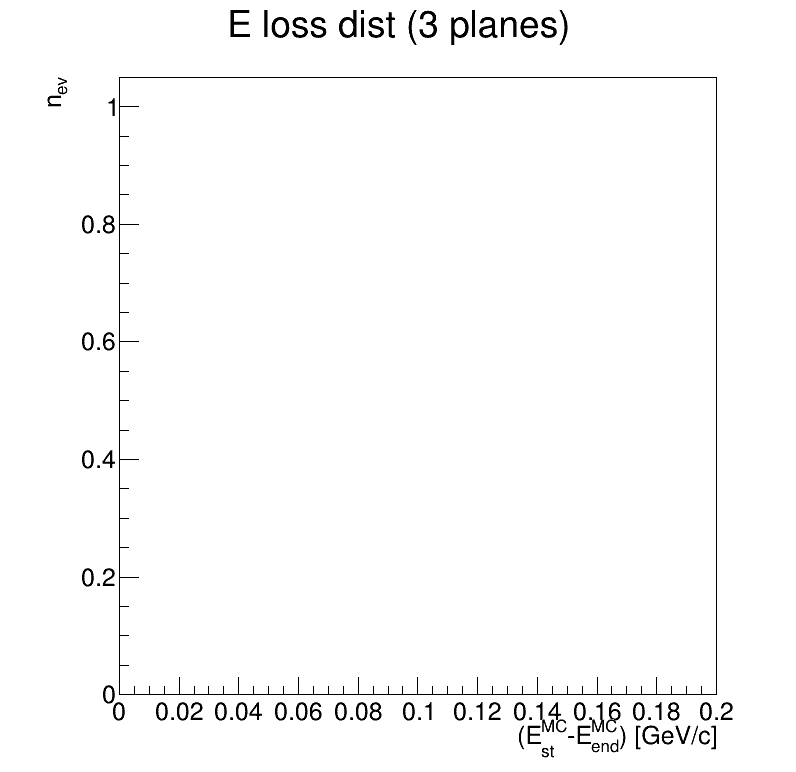

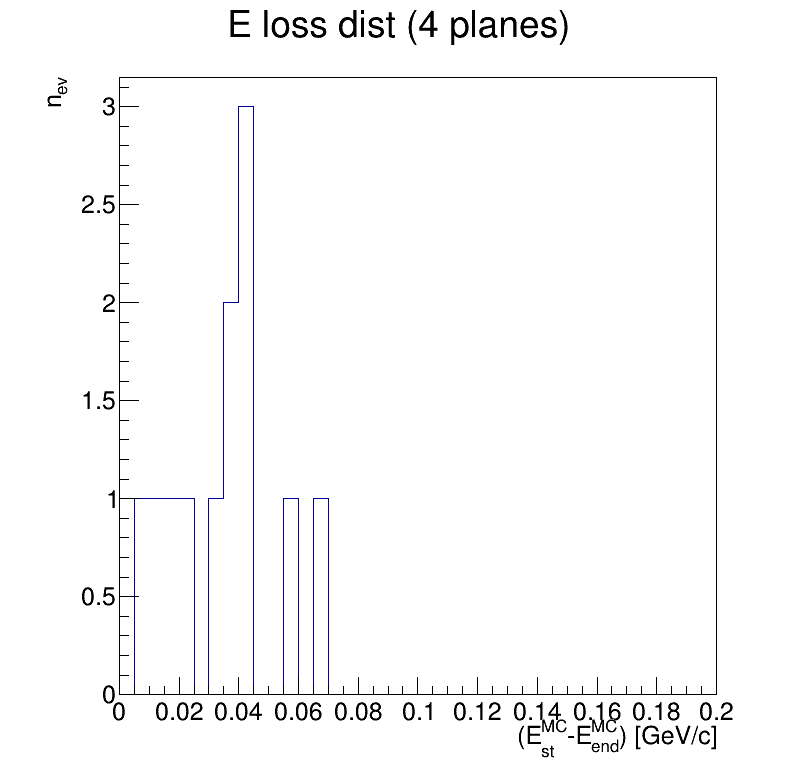

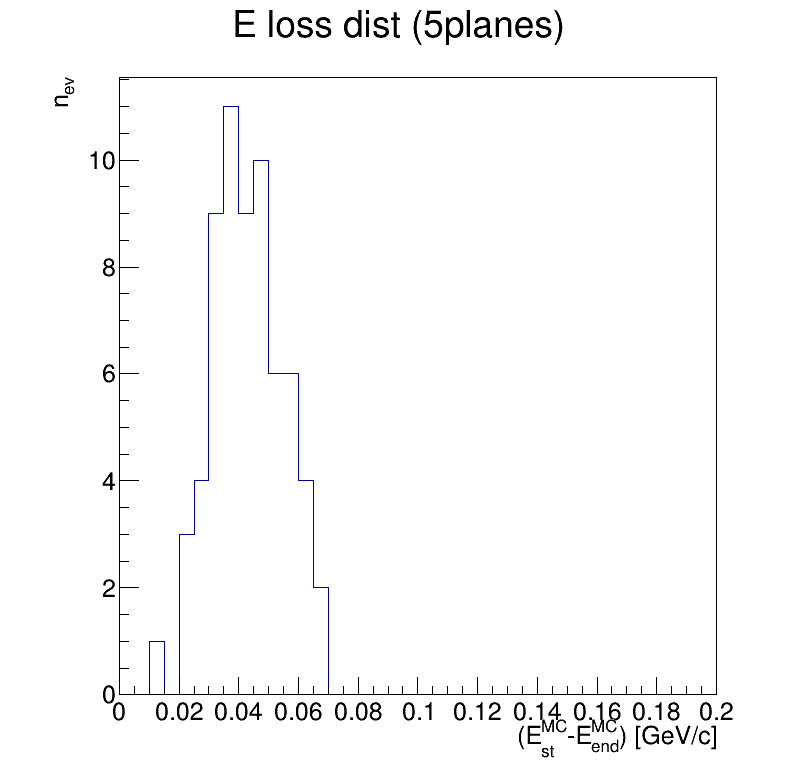

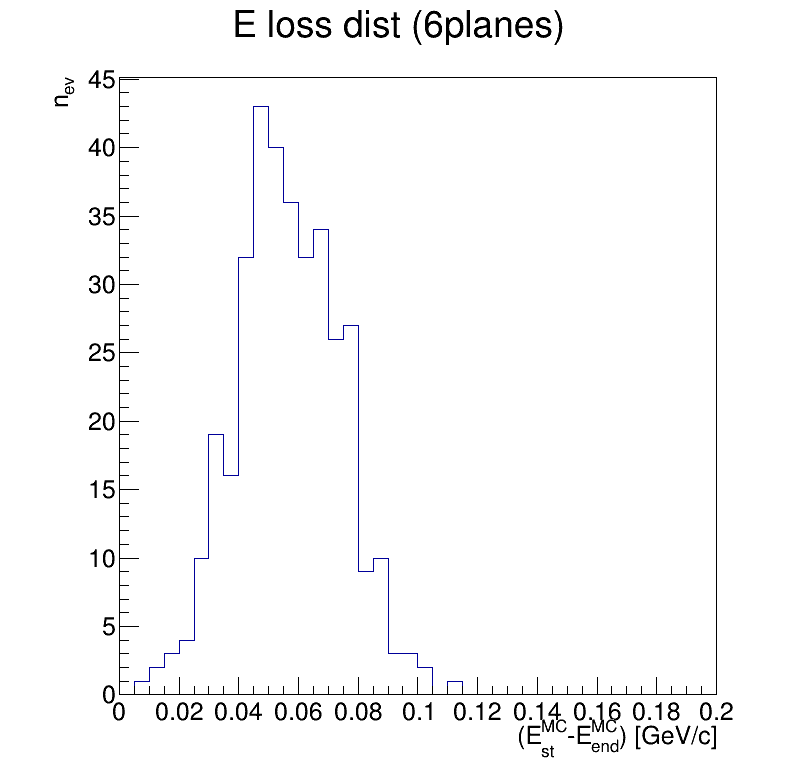

In [13]:
gStyle.SetOptStat(0)
cEloss3 = ROOT.TCanvas("myCanvasEloss3","The Canvas Eloss3",800,800)
hEloss3planes.SetTitle("E loss dist (3 planes);(E_{st}^{MC}-E_{end}^{MC}) [GeV/c];n_{ev}")
hEloss3planes.Draw()
cEloss3.SetLeftMargin(0.15)
cEloss3.Draw()
save=folder+"Eloss3planes_"+subfix1+subfix2+subfix3+png
cEloss3.Print(save)

cEloss4 = ROOT.TCanvas("myCanvasEloss4","The Canvas Eloss4",800,800)
hEloss4planes.SetTitle("E loss dist (4 planes);(E_{st}^{MC}-E_{end}^{MC}) [GeV/c];n_{ev}")
hEloss4planes.Draw()
cEloss4.SetLeftMargin(0.15)
cEloss4.Draw()
save=folder+"Eloss4planes_"+subfix1+subfix2+subfix3+png
cEloss4.Print(save)

cEloss5 = ROOT.TCanvas("myCanvasEloss5","The Canvas Eloss5",800,800)
hEloss5planes.SetTitle("E loss dist (5planes);(E_{st}^{MC}-E_{end}^{MC}) [GeV/c];n_{ev}")
hEloss5planes.Draw()
cEloss5.SetLeftMargin(0.15)
cEloss5.Draw()
save=folder+"Eloss5planes_"+subfix1+subfix2+subfix3+png
cEloss5.Print(save)

cEloss6 = ROOT.TCanvas("myCanvasEloss6","The Canvas Eloss6",800,800)
hEloss6planes.SetTitle("E loss dist (6planes);(E_{st}^{MC}-E_{end}^{MC}) [GeV/c];n_{ev}")
hEloss6planes.Draw()
cEloss6.SetLeftMargin(0.15)
cEloss6.Draw()
save=folder+"Eloss6planes_"+subfix1+subfix2+subfix3+png
cEloss6.Print(save)


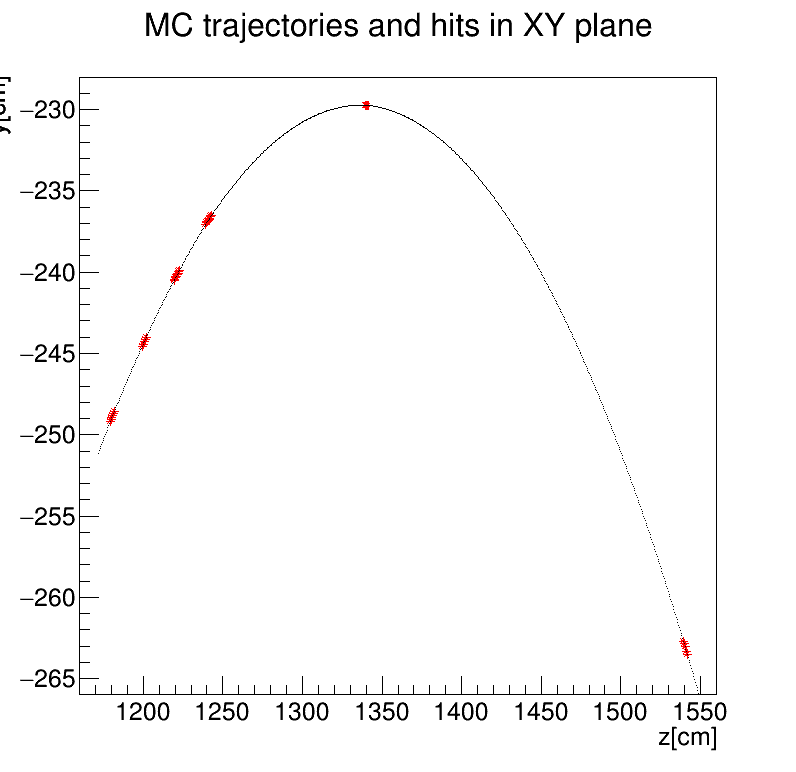

In [14]:
gStyle.SetOptStat(1)
ctr = ROOT.TCanvas("myCanvasNametr","The Canvas Titlet",800,800)
t.Draw("xyz_plane.fCoordinates.fY:xyz_plane.fCoordinates.fZ","","",1,0)
t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","SAME",1,0)
h = ROOT.TH1F
h = gPad.GetListOfPrimitives().At(3)
h.SetMarkerColor(kRed)
h.SetMarkerStyle(3)
h.SetMarkerSize(1)
h = gPad.GetListOfPrimitives().At(1)
h.SetTitle("MC trajectories and hits in XY plane; z[cm]; y[cm]")
t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","SAME",1,0)

ctr.Draw()

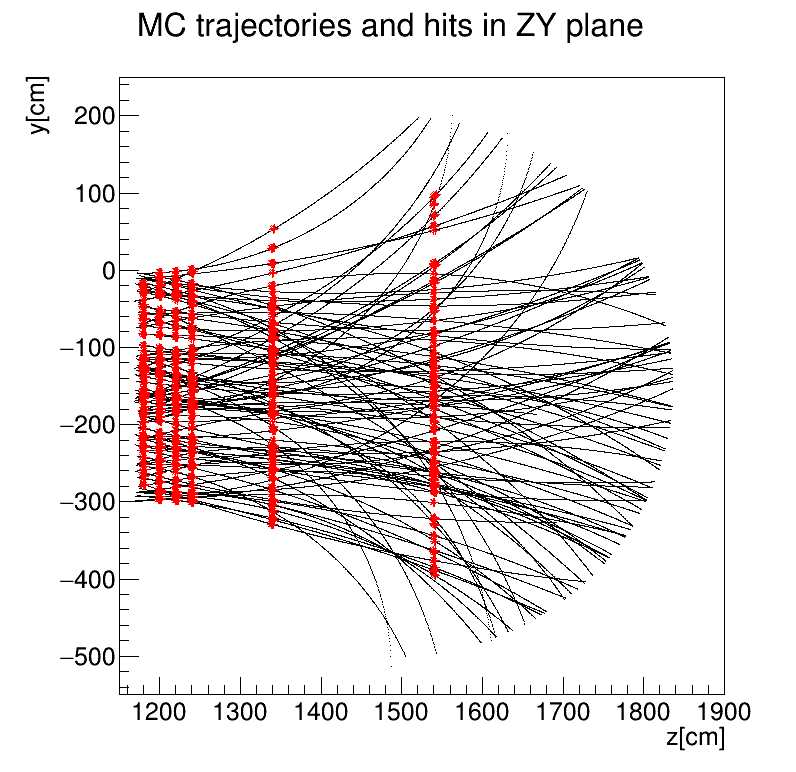

In [15]:
ctnewtr = ROOT.TCanvas("myCanvasNametnewtr","The Canvas Titletnew",800,800)
ctnewtr.SetRightMargin(0.09)
ctnewtr.SetLeftMargin(0.15)
t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","",100,0)
t.Draw("xyz_plane.fCoordinates.fY:xyz_plane.fCoordinates.fZ","","SAME",100,0)
h2 = ROOT.TH1F
h2 = gPad.GetListOfPrimitives().At(4)
h2.SetMarkerColor(kRed)
h2.SetMarkerStyle(3)
h2.SetMarkerSize(1)
h2 = gPad.GetListOfPrimitives().At(1)
h2.SetTitle("MC trajectories and hits in ZY plane; z[cm]; y[cm]")
#t.Draw("xyz.fCoordinates.fY:xyz.fCoordinates.fZ","","SAME",1,2)
ctnewtr.Draw()